In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import heapq

%matplotlib notebook

ERA+: 0.7683826530275879
R.1: 0.7664250084564106
ERA: 0.7627521360482582
ER: 0.7612130741528651
R: 0.7020655375618877
H9: 0.6999154159025085
WHIP: 0.6943857507240914
H.1: 0.6814884664043479
FIP: 0.680514735205967
RBI: 0.6782068389741454
OPS: 0.6567749147863788
OBP: 0.6373513603711434
SV: 0.5805872569542373
TB: 0.5658412842998497
SLG: 0.5622386971075573
SO.1: 0.5419861418178754
OPS+: 0.5224271521653293
SO9: 0.5059002266222583
PA: 0.4785712544053776
BA: 0.4741568161826446
HR9: 0.47398117842505394
H: 0.452740569476922
IP: 0.4505501156048346
BF: 0.434795014932152
HR.1: 0.4311677161053947


<IPython.core.display.Javascript object>


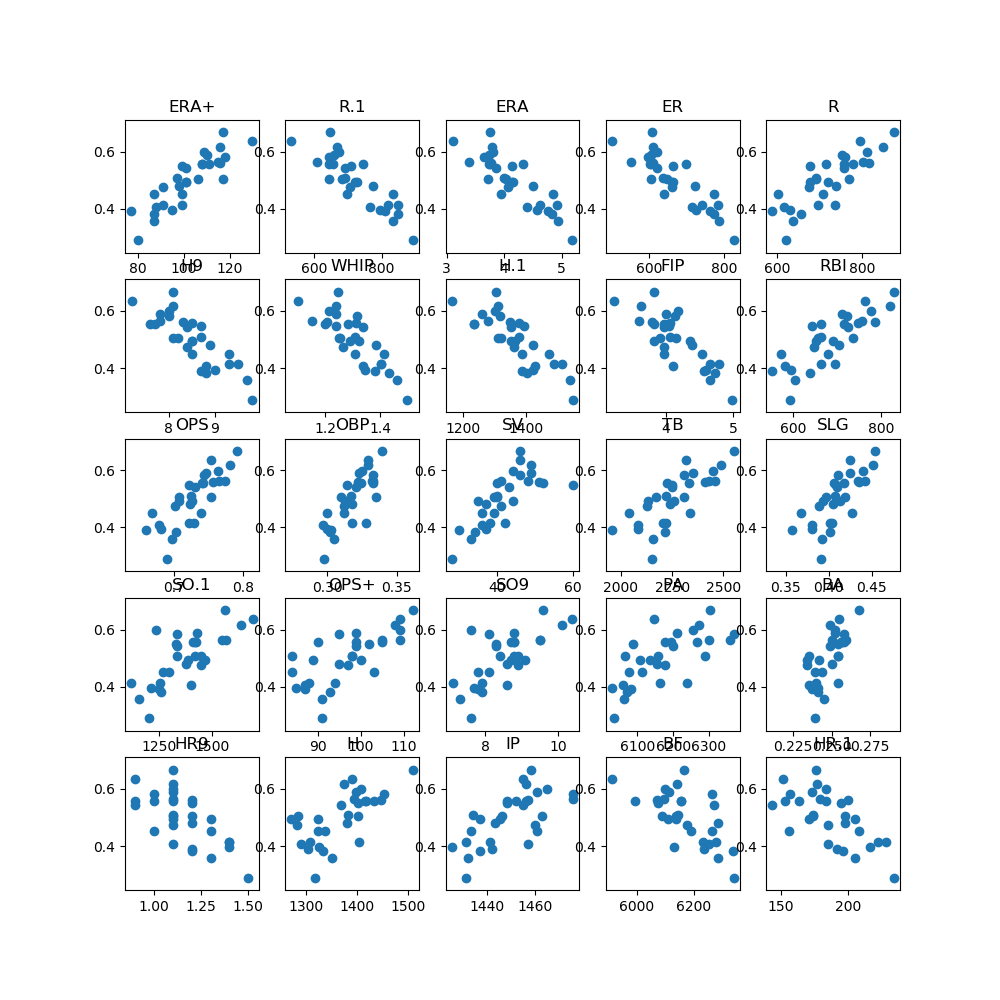

In [13]:
raw = pd.read_excel('./raw.xlsx', sheet_name='Batting')

# Calculate R^2 for each predictor variable
scores  = {}
for var in list(raw):
    if var in ['W-L%', 'Tm']:
        continue
    
    lr = LinearRegression().fit(np.array(raw[var]).reshape(-1, 1), raw['W-L%'])
    scores[var] = lr.score(np.array(raw[var]).reshape(-1, 1), raw['W-L%'])

# Display the top k^2 variables
K = 5
top = heapq.nlargest(K**2, scores, key=scores.get)
for rep in top:
    print(rep + ': ' + str(scores[rep]))

# Matrix plot the top k^2 variables
fig = plt.figure(figsize=(10, 10))
for i in range(K):
    for j in range(K):
        irep = i * K + j
        ax = fig.add_subplot(K, K, irep + 1)
        
        ax.scatter(raw[top[irep]], raw['W-L%'])
        plt.title(top[irep])
plt.show()

<IPython.core.display.Javascript object>


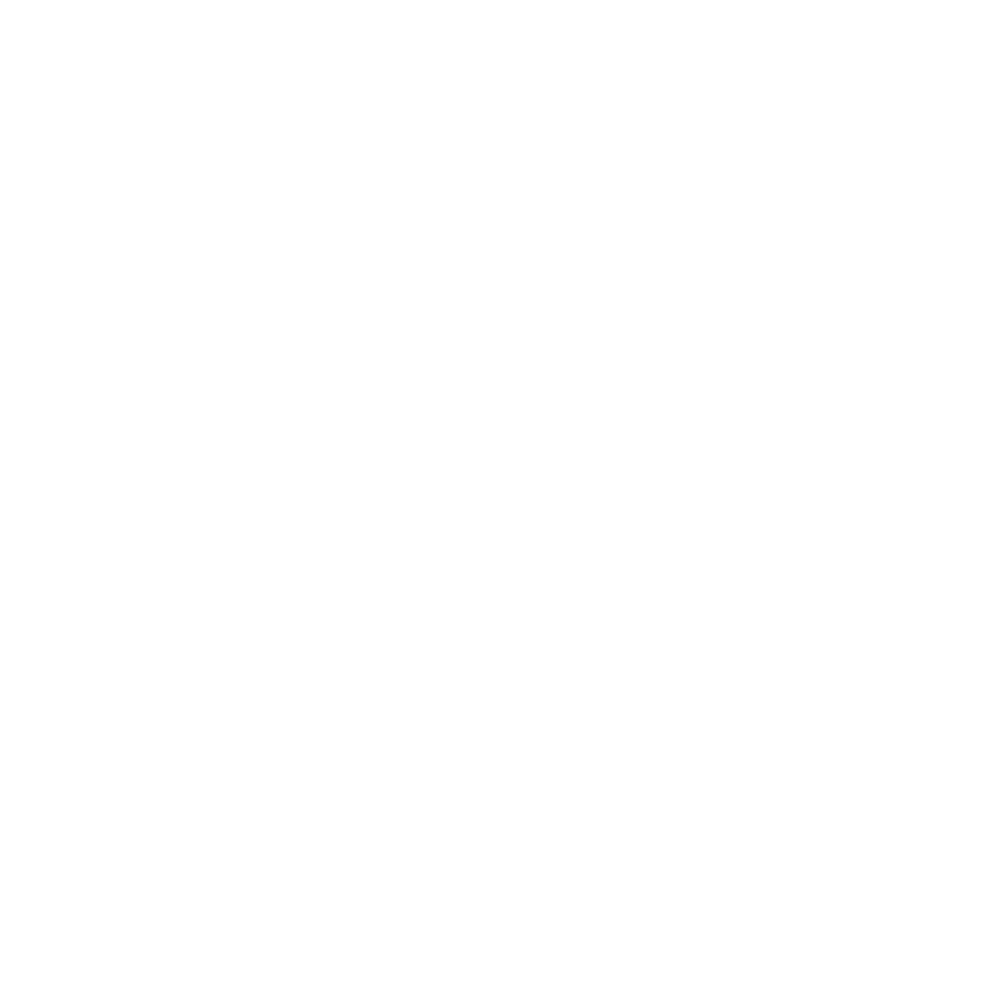

ValueError: Must enter at least two input sample vectors.

In [20]:
import scipy.stats

# p-values of the Levene test for homoscedasdicity
pvs = []
wvs = []

# Matrix plot the residuals by the top k^2 variables
fig = plt.figure(figsize=(10, 10))
for i in range(K):
    for j in range(K):
        irep = i * K + j
        
        X = raw[top[irep]]
        y = raw['W-L%']
        lr = LinearRegression().fit(np.array(X).reshape(-1, 1), y)
        resid = y - lr.predict(np.array(X).reshape(-1, 1))
        
        W, p = scipy.stats.levene(resid)
        pvs.append(p)
        wvs .append(W)
        
        ax = fig.add_subplot(K, K, irep + 1)
        ax.scatter(X, resid)
        plt.title(top[irep])
plt.show()


for i in range(len(top)):
    print(list(top)[i] + ': ' + str(pvs[i]) + ', ' + str(wvs[i]))